In [ ]:
from sapsan.general.data.jhtdb_dataset import JHTDB128Dataset, Equidistance3dSampling
from sapsan.general.estimator.cnn.spacial_3d_encoder import Spacial3dEncoderNetworkEstimator, Spacial3dEncoderNetworkEstimatorConfiguration
from sapsan.general.experiment import TrainingExperiment, EvaluationExperiment, FakeExperimentBackend

In [ ]:
dataset_root_dir = "/Users/icekhan/Documents/development/myprojects/sapsan/repo/Sapsan/dataset"
CHECKPOINT_DATA_SIZE = 128
SAMPLE_TO = 32
GRID_SIZE = 16
features = ['u', 'b', 'a',
            'du0', 'du1', 'du2',
            'db0', 'db1', 'db2',
            'da0', 'da1', 'da2']
labels = ['tn']

sampler = Equidistance3dSampling(CHECKPOINT_DATA_SIZE, SAMPLE_TO)

In [8]:
training_experiment_name = "Training experiment"
estimator = Spacial3dEncoderNetworkEstimator(
    config=Spacial3dEncoderNetworkEstimatorConfiguration(n_epochs=1, grid_dim=GRID_SIZE)
)
x, y = JHTDB128Dataset(path=dataset_root_dir,
                       features=features,
                       labels=labels,
                       checkpoints=[0.0],
					   grid_size=GRID_SIZE,
					   checkpoint_data_size=CHECKPOINT_DATA_SIZE,
					   sampler=sampler).load()

training_experiment = TrainingExperiment(name=training_experiment_name,
                                backend=FakeExperimentBackend(training_experiment_name),
                                model=estimator,
                                inputs=x, targets=y)
training_experiment.run()

<IPython.core.display.Javascript object>

[2020-02-13 18:09:48,864] 
1/1 * Epoch 1 (train): _base/lr=0.0010 | _base/momentum=0.9000 | _timers/_fps=83.6836 | _timers/batch_time=0.0478 | _timers/data_time=0.0344 | _timers/model_time=0.0132 | loss=0.0054
1/1 * Epoch 1 (valid): _base/lr=0.0010 | _base/momentum=0.9000 | _timers/_fps=85.5618 | _timers/batch_time=0.0467 | _timers/data_time=0.0311 | _timers/model_time=0.0153 | loss=0.0044
Top best models:
logs/checkpoints/train.1.pth	0.0044


INFO:metrics_logger:
1/1 * Epoch 1 (train): _base/lr=0.0010 | _base/momentum=0.9000 | _timers/_fps=83.6836 | _timers/batch_time=0.0478 | _timers/data_time=0.0344 | _timers/model_time=0.0132 | loss=0.0054
1/1 * Epoch 1 (valid): _base/lr=0.0010 | _base/momentum=0.9000 | _timers/_fps=85.5618 | _timers/batch_time=0.0467 | _timers/data_time=0.0311 | _timers/model_time=0.0153 | loss=0.0044


{'runtime': 1.5165631771087646}

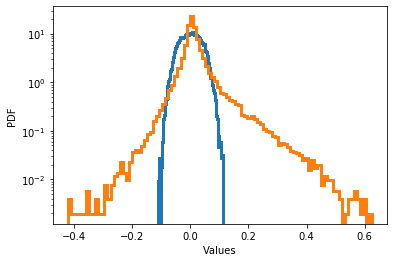

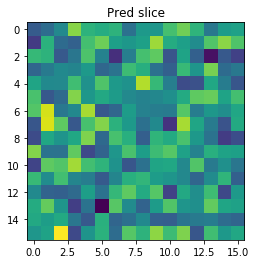

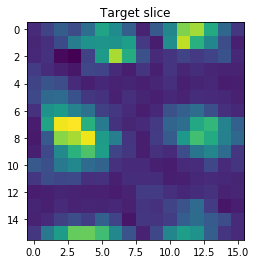

{'runtime': 0.8245611190795898}

In [9]:
x, y = JHTDB128Dataset(path=dataset_root_dir,
                       features=features,
                       labels=labels,
                       checkpoints=[0.01],
					   grid_size=GRID_SIZE,
					   checkpoint_data_size=CHECKPOINT_DATA_SIZE,
					   sampler=sampler).load()

model = Spacial3dEncoderNetworkEstimator(
    config=Spacial3dEncoderNetworkEstimatorConfiguration(n_epochs=1)
)


evaluation_experiment_name = "Evaluation experiment"
evaluation_experiment = EvaluationExperiment(name=evaluation_experiment_name,
											 backend=FakeExperimentBackend(evaluation_experiment_name),
											 model=training_experiment.model,
											 inputs=x, targets=y,
											 n_output_channels=3,
											 grid_size=GRID_SIZE)

evaluation_experiment.run()





